<a href="https://colab.research.google.com/github/dey-hritam/ML-Projects/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##PACKAGES:-

%matplotlib inline
import matplotlib.pyplot as plt   # MATLAB like plotting routines
import numpy as np                # advanced math library
import random                     # for generating random numbers
from keras.datasets import mnist  # MNIST dataset is included in Keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten  # Types of layers to be used in our model
from keras.utils import np_utils
!pip install gradio #installing gradio
import gradio as gr



In [ ]:

(x_train,y_train),(x_test,y_test)=mnist.load_data()
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)




x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


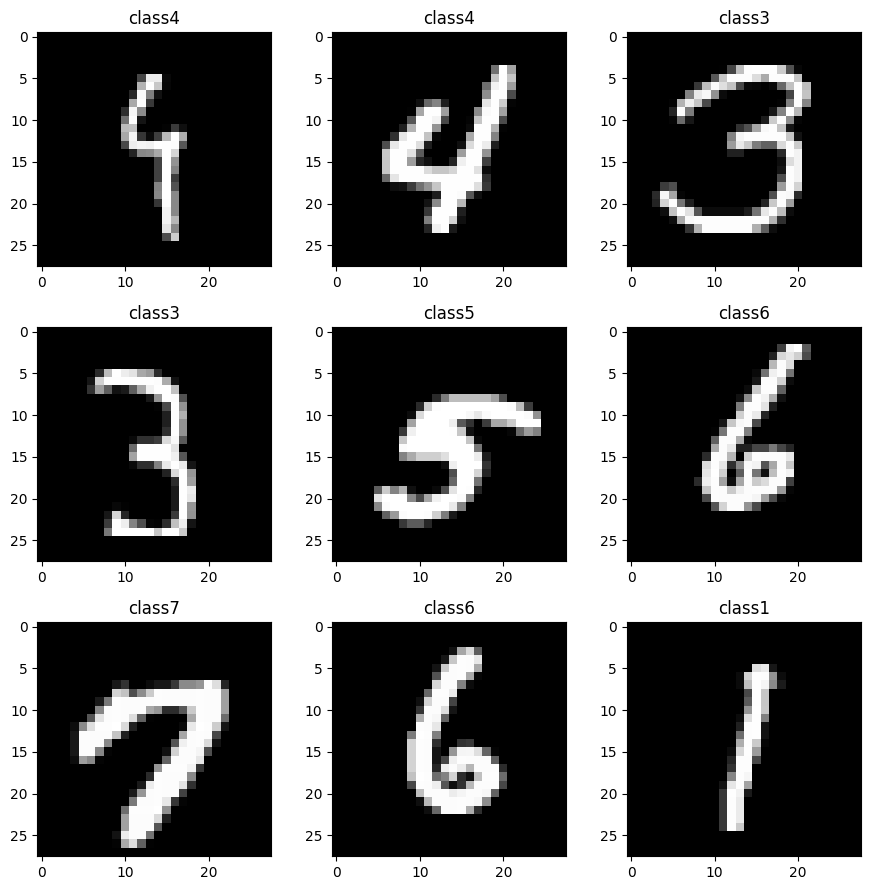

In [ ]:

plt.rcParams['figure.figsize'] = (9,9) #Define the size of the plot

for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_train))
  plt.imshow(x_train[num],cmap='gray',interpolation='none')
  plt.title("class{}".format(y_train[num]))

plt.tight_layout()

In [ ]:

# just a little function for pretty printing a matrix
# we can ignore it if we want
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

matprint(x_train[num])



0  0  0  0  0  0  0  0  0  0  0   0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0   0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0   0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0   0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0   0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0   0    0    0    0  222  234   23   0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0   0    0   11  210  254  253  147  12  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0   0    0   10  191  254  245  138  27  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0   0    0    0   72  254  198    0   0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0   0    0    0   91  254  198    0   0  0  0  0  0  0  0  0  0  0  
0  0  0  0

In [ ]:

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255

print("Trainning Mtrix shape:-",x_train.shape)
print("Testing Mtrix shape:-",x_test.shape)

Trainning Mtrix shape:- (60000, 28, 28)
Testing Mtrix shape:- (10000, 28, 28)


In [ ]:

model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(200,activation='relu',name='L1'),
    Dense(80,activation='relu',name='L2'),
    Dense(10,activation='linear',name='L3'),
])


In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 L1 (Dense)                  (None, 200)               157000    
                                                                 
 L2 (Dense)                  (None, 80)                16080     
                                                                 
 L3 (Dense)                  (None, 10)                810       
                                                                 
Total params: 173,890
Trainable params: 173,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:



model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.fit(x_train, y_train, batch_size=128, epochs=12, verbose=0)




In [ ]:

score=model.evaluate(x_test,y_test)
print(f"Test loss: {score[0]}")
print(f"Test Accuracy:{score[1]}")




313/313 [==============================] - 1s 2ms/step - loss: 0.0892 - accuracy: 0.9777
Test loss: 0.08917393535375595
Test Accuracy:0.9776999950408936


In [ ]:

# The predict_classes function outputs the highest probability class according to the trained classifier for each input example.

predicted_classes=np.argmax(model.predict(x_test),axis=1)

# Check which items we got right / wrong
correct_indices=np.nonzero(predicted_classes == y_test)[0]

incorrect_indices=np.nonzero(predicted_classes != y_test)[0]



313/313 [==============================] - 1s 2ms/step


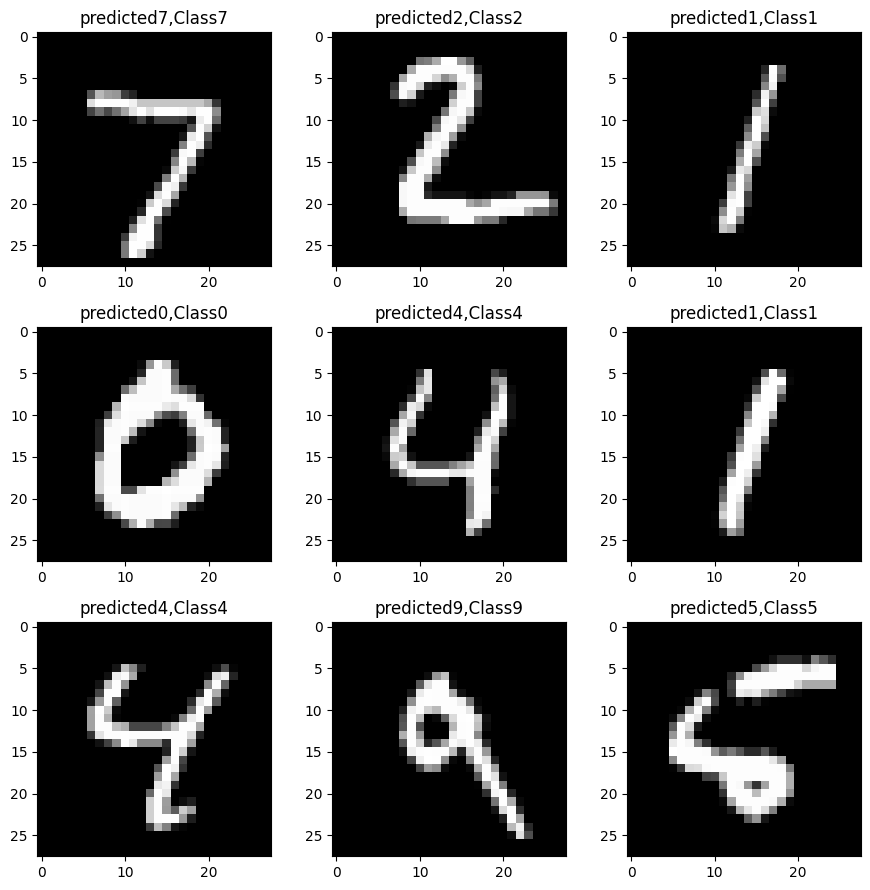

In [ ]:

#printing the correct predictions
plt.figure()
for i,correct in enumerate(correct_indices[:9]):
  plt.subplot(3,3,i+1)
  plt.imshow(x_test[correct].reshape(28,28),cmap='gray',interpolation='none')
  plt.title("predicted{},Class{}".format(predicted_classes[correct],y_test[correct]))

plt.tight_layout()



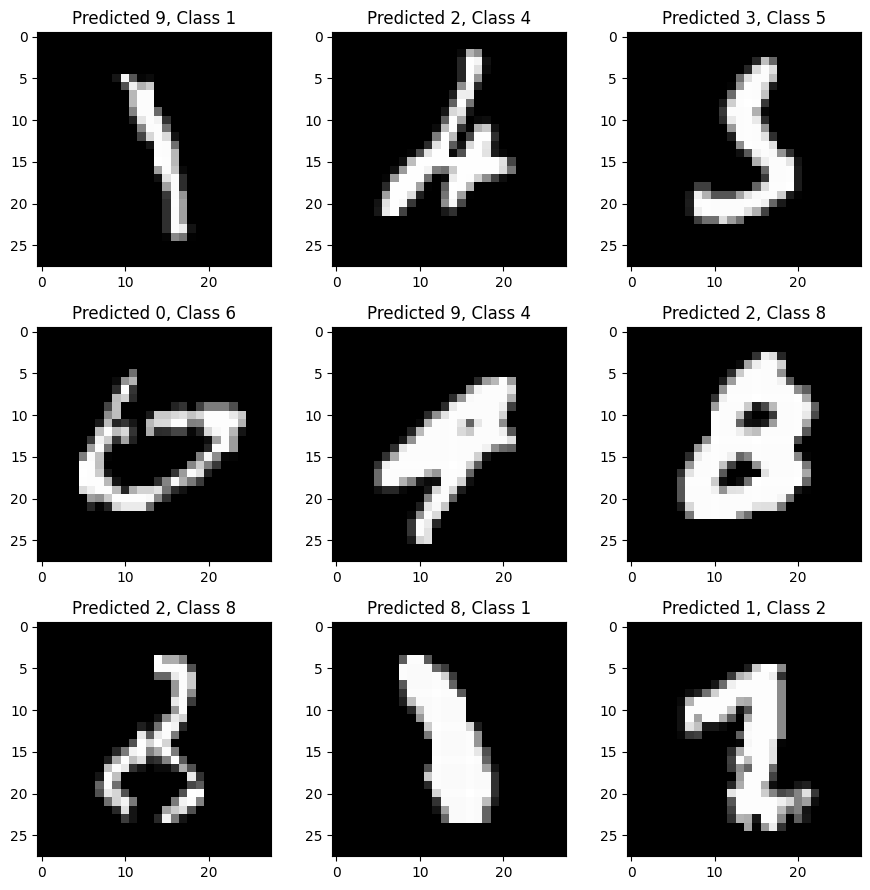

In [ ]:
#printing the incorrect predictions
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

plt.tight_layout()




In [ ]:


# Define a function that takes an image as input and returns the predicted class
def classify_digit(image):
    # Preprocess the image and make a prediction
    processed_image = image / 255.0
    prediction = model.predict(processed_image.reshape(1, 28, 28))
    predicted_class = np.argmax(prediction)
    return str(predicted_class)


# Define the output component for Gradio
output_component = gr.outputs.Textbox()

# Create the Gradio interface
gr.Interface(fn=classify_digit, inputs= "sketchpad", outputs=output_component).launch(debug= True, share= True)



<ipython-input-73-4f6c52a542ac>:15: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  output_component = gr.outputs.Textbox()


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://1133739bc239cb489b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 23ms/step
